In [1]:
#Rafael Leinio Pereira 103238
import cv2
import matplotlib.pyplot as plt
import numpy as np
from copy import copy, deepcopy

def limites (n, minn = 0, maxn = 255): #coloca range de números entre 0 e 255
    return max(min(maxn, n), minn)

In [2]:
##### 1
lena = cv2.resize(cv2.imread("lena.jpg",0),(536,536)) #deixando a img quadrada pra ficar mais facil kkk

In [3]:
shape = lena.shape
shape

(536, 536)

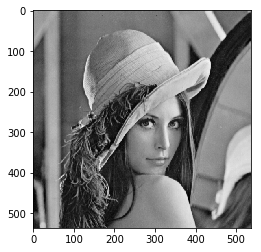

In [4]:
plt.figure()
plt.imshow(lena,cmap='gray')
plt.show()

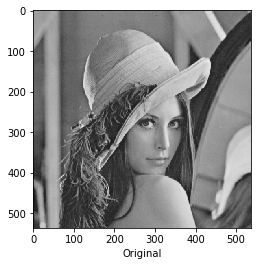

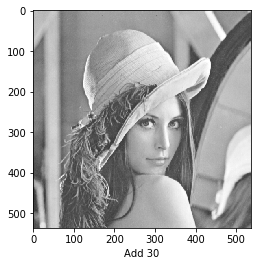

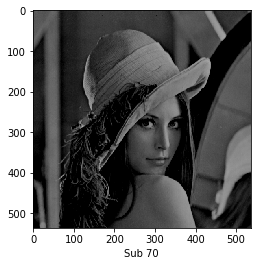

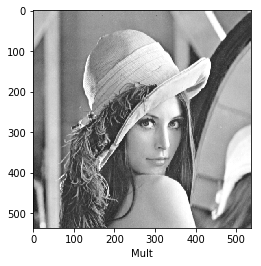

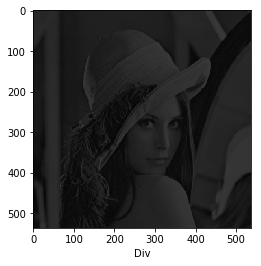

In [5]:
##### 2
lena_soma30 = deepcopy(lena)
lena_sub70 = deepcopy(lena)
lena_mult = deepcopy(lena)
lena_div = deepcopy(lena)
for l in range(shape[0]):
    for c in range(shape[1]):
        add = [255,lena_soma30[l][c] + 30]
        sub = [0,lena_soma30[l][c] - 70]
        mult = [255,lena_mult[l][c]*1.2]
        lena_soma30[l][c] = min(add)
        lena_sub70[l][c] = max(sub)
        lena_mult[l][c] = min(mult)
        lena_div[l][c] = int(lena_div[l][c]/4)

plt.figure()
plt.imshow(lena,cmap='gray', vmin=0, vmax=255)
plt.xlabel("Original")
plt.show()

plt.imshow(lena_soma30,cmap='gray', vmin=0, vmax=255)
plt.xlabel("Add 30")
plt.show()

plt.figure()
plt.imshow(lena_sub70,cmap='gray', vmin=0, vmax=255)
plt.xlabel("Sub 70")
plt.show()

plt.figure()
plt.imshow(lena_mult,cmap='gray', vmin=0, vmax=255)
plt.xlabel("Mult")
plt.show()

plt.figure()
plt.imshow(lena_div,cmap='gray', vmin=0, vmax=255)
plt.xlabel("Div")
plt.show()

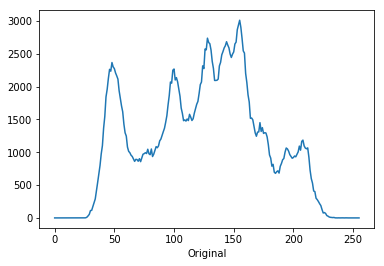

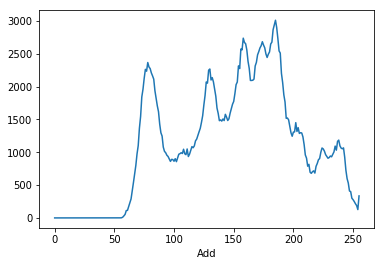

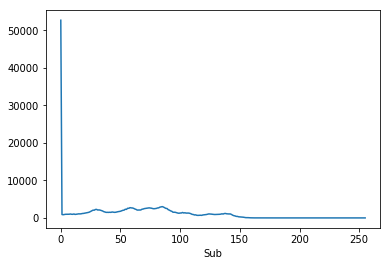

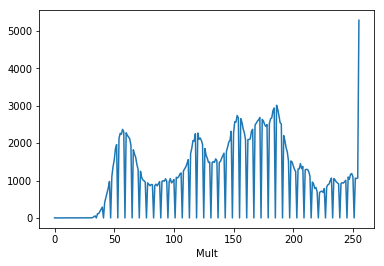

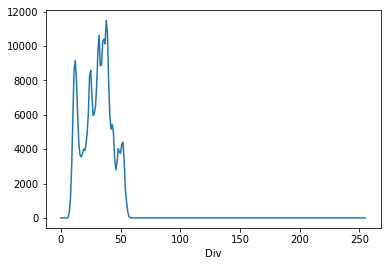

In [6]:
##### 3 e 4
hist_lena_original= np.zeros(256,dtype=int)
hist_lena_add= np.zeros(256,dtype=int)
hist_lena_sub= np.zeros(256,dtype=int)
hist_lena_mult= np.zeros(256,dtype=int)
hist_lena_div= np.zeros(256,dtype=int)

for l in range(shape[0]):
    for c in range(shape[1]):
        hist_lena_original[lena[l][c]]+=1
        hist_lena_add[lena_soma30[l][c]]+=1
        hist_lena_sub[lena_sub70[l][c]]+=1
        hist_lena_mult[lena_mult[l][c]]+=1
        hist_lena_div[lena_div[l][c]]+=1

plt.plot(hist_lena_original)
plt.xlabel("Original")
plt.show()

plt.plot(hist_lena_add)
plt.xlabel("Add")
plt.show()

plt.plot(hist_lena_sub)
plt.xlabel("Sub")
plt.show()

plt.plot(hist_lena_mult)
plt.xlabel("Mult")
plt.show()

plt.plot(hist_lena_div)
plt.xlabel("Div")
plt.show()

In [7]:
##### 5
#####Maximum Error
ME_add = 0
ME_sub = 0
ME_mult = 0
ME_div = 0
for l in range(shape[0]):
    for c in range(shape[1]):
        ME_add = max(abs(int(lena[l][c])-int(lena_soma30[l][c])), ME_add)
        ME_sub = max(abs(int(lena[l][c])-int(lena_sub70[l][c])), ME_sub)
        ME_mult = max(abs(int(lena[l][c])-int(lena_mult[l][c])), ME_mult)
        ME_div = max(abs(int(lena[l][c])-int(lena_div[l][c])), ME_div)

print(ME_add,ME_sub,ME_mult,ME_div)

(30, 70, 42, 183)


In [8]:
#Mean Absolute Error
MAE_add = 0
MAE_sub = 0
MAE_mult = 0
MAE_div = 0
for l in range(shape[0]):
    for c in range(shape[1]):
        MAE_add += abs(int(lena[l][c])-int(lena_soma30[l][c]))
        MAE_sub += abs(int(lena[l][c])-int(lena_sub70[l][c]))
        MAE_mult += abs(int(lena[l][c])-int(lena_mult[l][c]))
        MAE_div += abs(int(lena[l][c])-int(lena_div[l][c]))
        
MAE_add = MAE_add/(shape[0]*shape[1])
MAE_sub = MAE_sub/(shape[0]*shape[1])
MAE_mult = MAE_mult/(shape[0]*shape[1])
MAE_div = MAE_div/(shape[0]*shape[1])
                   
print(MAE_add,MAE_sub,MAE_mult,MAE_div)

(29, 66, 24, 93)


In [9]:
#Mean Square Error
MSE_add = 0
MSE_sub = 0
MSE_mult = 0
MSE_div = 0
for l in range(shape[0]):
    for c in range(shape[1]):
        MSE_add += (abs(int(lena[l][c])-int(lena_soma30[l][c])))**2
        MSE_sub += (abs(int(lena[l][c])-int(lena_sub70[l][c])))**2
        MSE_mult += (abs(int(lena[l][c])-int(lena_mult[l][c])))**2
        MSE_div += (abs(int(lena[l][c])-int(lena_div[l][c])))**2
        
MSE_add = MSE_add/(shape[0]*shape[1])
MSE_sub = MSE_sub/(shape[0]*shape[1])
MSE_mult = MSE_mult/(shape[0]*shape[1])
MSE_div = MSE_div/(shape[0]*shape[1])
                   
print(MSE_add,MSE_sub,MSE_mult,MSE_div)

(899, 4500, 678, 10001)


In [10]:
#Root Mean Square Error
RMSE_add = 0
RMSE_sub = 0
RMSE_mult = 0
RMSE_div = 0
for l in range(shape[0]):
    for c in range(shape[1]):
        RMSE_add += (abs(int(lena[l][c])-int(lena_soma30[l][c])))**2
        RMSE_sub += (abs(int(lena[l][c])-int(lena_sub70[l][c])))**2
        RMSE_mult += (abs(int(lena[l][c])-int(lena_mult[l][c])))**2
        RMSE_div += (abs(int(lena[l][c])-int(lena_div[l][c])))**2
        
RMSE_add = np.sqrt(RMSE_add/(shape[0]*shape[1]))
RMSE_sub = np.sqrt(RMSE_sub/(shape[0]*shape[1]))
RMSE_mult = np.sqrt(RMSE_mult/(shape[0]*shape[1]))
RMSE_div = np.sqrt(RMSE_div/(shape[0]*shape[1]))
                   
print(RMSE_add,RMSE_sub,RMSE_mult,RMSE_div)

(29.983328701129899, 67.082039324993687, 26.038433132583073, 100.00499987500625)


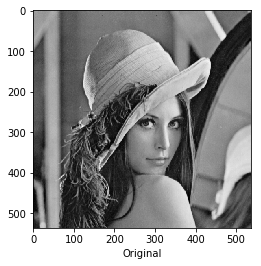

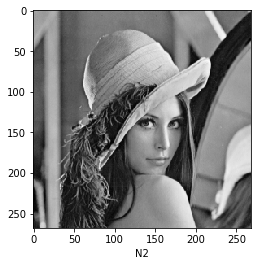

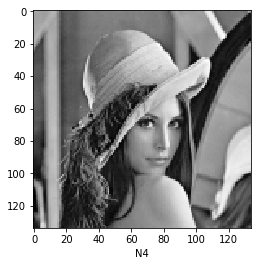

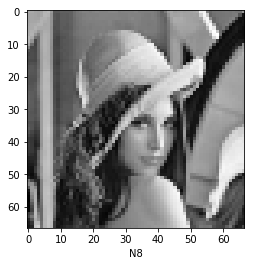

In [11]:
#####6
def blockshaped(arr, nrows, ncols): #divide a matrix em blocos do tamanho definido nrows * ncols
    h, w = arr.shape
    return (arr.reshape(h//nrows, nrows, -1, ncols)
               .swapaxes(1,2)
               .reshape(-1, nrows, ncols))

#N2
lena_n2 = np.zeros((lena.shape[0]/2,lena.shape[1]/2),dtype=int)
batches_2x2 = blockshaped(np.asarray(lena),2,2) #batches_2x2 é uma lista de matrizes 2x2
i=0

for l in range(lena_n2.shape[0]):
    for c in range(lena_n2.shape[1]):
        lena_n2[l][c] = np.matrix(batches_2x2[i]).mean() #cada pixel da lena_n2 é a média de um batch 2x2 da original
        i+=1

#N4
lena_n4 = np.zeros((lena_n2.shape[0]/2,lena_n2.shape[1]/2),dtype=int)
batches_2x2 = blockshaped(np.asarray(lena_n2),2,2) #batches_2x2 é uma lista de matrizes 2x2
i=0

for l in range(lena_n4.shape[0]):
    for c in range(lena_n4.shape[1]):
        lena_n4[l][c] = np.matrix(batches_2x2[i]).mean() #cada pixel da lena_n4 é a média de um batch 2x2 da n2
        i+=1

#N8
lena_n8 = np.zeros((lena_n4.shape[0]/2,lena_n4.shape[1]/2),dtype=int)
batches_2x2 = blockshaped(np.asarray(lena_n4),2,2) #batches_2x2 é uma lista de matrizes 2x2
i=0

for l in range(lena_n8.shape[0]):
    for c in range(lena_n8.shape[1]):
        lena_n8[l][c] = np.matrix(batches_2x2[i]).mean() #cada pixel da lena_n8 é a média de um batch 2x2 da n4
        i+=1

plt.figure()
plt.imshow(lena,cmap='gray')
plt.xlabel("Original")
plt.show()

plt.figure()
plt.imshow(lena_n2,cmap='gray')
plt.xlabel("N2")
plt.show()

plt.figure()
plt.imshow(lena_n4,cmap='gray')
plt.xlabel("N4")
plt.show()

plt.figure()
plt.imshow(lena_n8,cmap='gray')
plt.xlabel("N8")
plt.show()

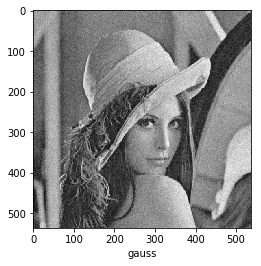

In [12]:
#####7
mu,sigma = 0,10
gauss = np.random.normal(mu,sigma,lena.shape) #matriz float
lena_gauss = lena + gauss

#normalizando de 0  255 inteiro
for l in range(shape[0]):
    for c in range(shape[1]):
        lena_gauss[l][c] = int(limites(lena_gauss[l][c]))

plt.figure()
plt.imshow(lena_gauss,cmap='gray')
plt.xlabel("gauss")
plt.show()

In [13]:
#####8
#entropia lena
H_lena= 0.0
for ni in hist_lena_original:
    pi = float(ni)/256 #ni/n
    if pi != 0: #se pi = 0 não entra na soma
        H_lena += pi*np.log2(pi)

#criando o array de histograma do gauss
hist_lena_gauss= np.zeros(256,dtype=int)

for l in range(shape[0]):
    for c in range(shape[1]):
        hist_lena_gauss[int(lena_gauss[l][c])]+=1
        
#entropia gauss
H_gauss = 0.0
for ni in hist_lena_gauss:
    pi = float(ni)/256
    if pi != 0:
        H_gauss += pi*np.log2(pi)


print(H_lena,H_gauss)

(3022.3863182097552, 2879.1211319012787)


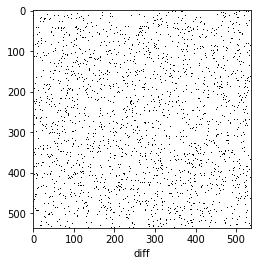

In [14]:
#####9
diff_lena = np.zeros(shape,dtype =int)
for l in range(shape[0]):
    for c in range(shape[1]):
        if(lena[l][c] != lena_gauss[l][c]):
            diff_lena[l][c] = 255

plt.figure()
plt.imshow(diff_lena,cmap='gray')
plt.xlabel("diff")
plt.show()

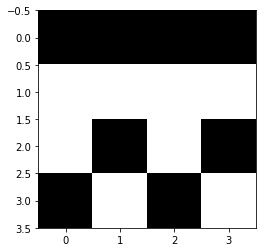

Vinhança 4: Número de Objetos de pixeis conexos: 5
Vinhança 8: Número de Objetos de pixeis conexos: 2


In [16]:
#####10 - Algorito de varredura de objetos de pixeis conexos
##Não vou fazer a varredura na img de cima pq vai ser difícil verificar a corretude do algoritmo
#vou montar uma img menor

objetos = [] #grupo de objetos, objeto é um grupo de pixels, pixel é uma tupla x,y
def cria_grupo(pixel):
    novo_objeto = [pixel]
    objetos.append(novo_objeto)

def procura_grupo(alvo, v, limite_superior): #v= vizinhaca, alvo = uma tupla x,y
    objetos_encontrados = []
    for objeto in objetos:
        for pixel in objeto:
            if (v==4): #cruz
                x = alvo[0]
                y = alvo [1]
                e = alvo[0]-1
                d = alvo[0]+1
                c = alvo[1]+1
                b = alvo[1]-1
                if(e >= 0 and [e,y] == pixel): #verifica limite e vizinho a esquerda
                    if objeto not in objetos_encontrados: objetos_encontrados.append(objeto)
                if(d < limite_superior and [d,y] == pixel): #verifica limite e vizinho a direita
                    if objeto not in objetos_encontrados: objetos_encontrados.append(objeto)
                if(c < limite_superior and [x,c] == pixel): #verifica limite e vizinho em cima 
                    if objeto not in objetos_encontrados: objetos_encontrados.append(objeto)
                if(b >= 0 and [x,b] == pixel): #verifica limite e objeto em baixo
                    if objeto not in objetos_encontrados: objetos_encontrados.append(objeto)
                
            if (v==8): #quadrado 3x3
                x = alvo[0]
                y = alvo [1]
                e = alvo[0]-1
                d = alvo[0]+1
                c = alvo[1]+1
                b = alvo[1]-1
                if(e >= 0 and [e,y] == pixel): #verifica limite e vizinho a esquerda
                    if objeto not in objetos_encontrados: objetos_encontrados.append(objeto)
                if(d < limite_superior and [d,y] == pixel): #verifica limite e vizinho a direita
                    if objeto not in objetos_encontrados: objetos_encontrados.append(objeto)
                if(c < limite_superior and [x,c] == pixel): #verifica limite e vizinho em cima 
                    if objeto not in objetos_encontrados: objetos_encontrados.append(objeto)
                if(b >= 0 and [x,b] == pixel): #verifica limite e objeto em baixo
                    if objeto not in objetos_encontrados: objetos_encontrados.append(objeto)
                if(e>=0 and c< limite_superior and [e,c] == pixel):
                    if objeto not in objetos_encontrados: objetos_encontrados.append(objeto)
                if(d< limite_superior and c< limite_superior and [d,c] == pixel):
                    if objeto not in objetos_encontrados: objetos_encontrados.append(objeto)
                if(d< limite_superior and b>=0 and [d,b] == pixel):
                    if objeto not in objetos_encontrados: objetos_encontrados.append(objeto)
                if(e>=0 and b>=0 and [e,b] == pixel):
                    if objeto not in objetos_encontrados: objetos_encontrados.append(objeto)
    
    #verificando quantos objetos encontrou na vizinhança
    if (len(objetos_encontrados) > 0):
        if(len(objetos_encontrados) >1): #encontrou mais de um objeto na vizinhança, mergear os objetos em um
            novo_objeto = []
            for objeto in objetos_encontrados:
                novo_objeto += objeto
                if objeto in objetos: 
                    objetos.remove(objeto) #tirando objetos que vão ser mergeados da lista de objetos
            objetos.append(novo_objeto) #colocando objeto novo mergeado na lista de objetos
            novo_objeto[0].append(alvo) #colocando o pixel alvo no objeto mergeado
        else: #apenas um grupo encontrado
            objetos_encontrados[0].append(alvo) #colocando o pixel alvo no único objeto encontrado
            
    else:
        #não achou nenhum objeto com os pixels da vizinhança, criar um novo grupo e inserir o pixel atual (alvo)
        cria_grupo(alvo)
    
#criando img
icone = [
    [0,0,0,0],
    [1,1,1,1],
    [1,0,1,0],
    [0,1,0,1]
]
plt.figure()
plt.imshow(icone,cmap='gray')
plt.show()

limite_superior = 4
vizinhanca = 4 #4 ou 8
#varrendo imagem procurando os objetos de pixeis conexos
for l in range(limite_superior):
    for c in range(limite_superior):
        if(icone[l][c] == 0): #se for pixel preto procurar objeto
            pixel_atual = [l,c]
            procura_grupo(pixel_atual,vizinhanca,limite_superior)
print ("Vinhança 4: Número de Objetos de pixeis conexos: " + str(len(objetos)))

objetos = []
vizinhanca = 8 #4 ou 8
#varrendo imagem procurando os objetos de pixeis conexos
for l in range(limite_superior):
    for c in range(limite_superior):
        if(icone[l][c] == 0): #se for pixel preto procurar objeto
            pixel_atual = [l,c]
            procura_grupo(pixel_atual,vizinhanca,limite_superior)
print ("Vinhança 8: Número de Objetos de pixeis conexos: " + str(len(objetos)))